# Packages

In [16]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import scipy.interpolate  as s
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
my_summary = pd.read_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'), 
                         index_col="Unnamed: 0")
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))

# Posteriors

In [ ]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#8c510a','#bf812d','#80cdc1','#35978f','#01665e'])
figsize      = (15, 15)
alpha        = 0.6

In [ ]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

In [ ]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.8,1.8])
        plt.ylim([0,3.])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout(w_pad=0)
plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Probability x Mass

In [4]:
header = my_summary.keys()

In [5]:
class01, class02, class03, class04, class05 = np.split(my_summary.values, 5)

In [9]:
class01_df = pd.DataFrame(class01)
class01_df.columns = header

In [10]:
class02_df = pd.DataFrame(class02)
class02_df.columns = header

In [11]:
class03_df = pd.DataFrame(class03)
class03_df.columns = header

In [12]:
class04_df = pd.DataFrame(class04)
class04_df.columns = header

In [14]:
class05_df = pd.DataFrame(class05)
class05_df.columns = header

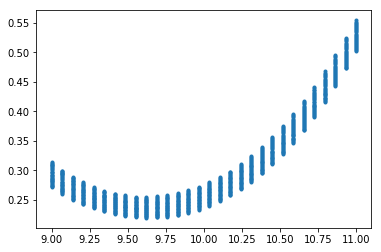

In [15]:
plt.plot(class01_df["LOG_STELLAR_MASS"], class01_df["50%"], '.')
plt.show()

In [24]:
class01_df.describe()

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
count,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10000.0,0.319940,0.105929,0.074920,0.146908,0.240624,0.309138,0.388865,0.549514,0.733883,10.000000,0.313695
std,0.0,0.080668,0.047554,0.062069,0.090683,0.090693,0.084498,0.089706,0.132477,0.147048,0.597259,0.146779
min,10000.0,0.224528,0.052316,0.000162,0.014212,0.124739,0.219009,0.263835,0.345942,0.445477,9.000000,0.067940
25%,10000.0,0.259863,0.071845,0.013961,0.071034,0.168877,0.247950,0.315846,0.441965,0.633123,9.482759,0.186580
50%,10000.0,0.292560,0.090964,0.072677,0.141342,0.211260,0.273654,0.366726,0.527405,0.728624,10.000000,0.313695
75%,10000.0,0.354799,0.119578,0.110805,0.205564,0.296386,0.350217,0.449378,0.648956,0.843034,10.517241,0.440810
max,10000.0,0.551509,0.247496,0.232721,0.343612,0.465597,0.554613,0.646681,0.872520,0.992805,11.000000,0.559450


In [40]:
unique_masses = np.unique(class01_df["LOG_STELLAR_MASS"].values)

30

In [43]:
for i in range(unique_masses.size):
    if i==0:
        summary_temp = pd.DataFrame(class01_df[class01_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp    = summary_temp.loc[["mean"]]
        mean_all_df  = mean_temp
    else:
        summary_temp = pd.DataFrame(class01_df[class01_df["LOG_STELLAR_MASS"].values==unique_masses[i]].describe())
        mean_temp    = summary_temp.loc[["mean"]]
        mean_all_df  = pd.concat([mean_all_df, mean_temp])
mean_all_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
mean,10000.0,0.334051,0.234960,0.000175,0.015134,0.135575,0.291911,0.497905,0.842736,0.985700,9.000000,0.313695
mean,10000.0,0.318087,0.216059,0.000360,0.019576,0.139826,0.279767,0.462686,0.798256,0.975622,9.068966,0.313695
mean,10000.0,0.303219,0.197058,0.000718,0.025025,0.144108,0.269185,0.430840,0.748415,0.960243,9.137931,0.313695
mean,10000.0,0.289704,0.178339,0.001389,0.031727,0.148696,0.260500,0.403068,0.697599,0.938395,9.206897,0.313695
mean,10000.0,0.277760,0.160291,0.002601,0.039459,0.153528,0.253078,0.377962,0.645329,0.908058,9.275862,0.313695
mean,10000.0,0.267553,0.143281,0.004720,0.048511,0.158701,0.247159,0.356196,0.595602,0.868020,9.344828,0.313695
mean,10000.0,0.259193,0.127631,0.008290,0.059114,0.163975,0.242714,0.337621,0.549860,0.818028,9.413793,0.313695
mean,10000.0,0.252732,0.113595,0.013706,0.070294,0.169198,0.239288,0.322494,0.508608,0.759203,9.482759,0.313695
mean,10000.0,0.248171,0.101354,0.020665,0.082226,0.174100,0.237081,0.310943,0.474213,0.699258,9.551724,0.313695
mean,10000.0,0.245473,0.091032,0.029664,0.094371,0.179372,0.236103,0.302233,0.447478,0.654255,9.620690,0.313695


In [32]:
pd.DataFrame.stack??